In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [53]:
df = pd.read_csv("C:/Users/user/Desktop/BTS/Master/1st_Semester/Data Science Foundations/BTS_MasterInBigData/BTS_MasterInBigData/Session_2/2_titanic_dataset.csv")

In [54]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [55]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

df["Title"] = df['Name'].apply(get_title)

In [56]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [57]:
# Replace all rare titles by Rare
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
'Rare')

In [58]:
df['Title'] = df['Title'].replace('Mile', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [59]:
df.loc[df['Age'] <= 16, 'NumericAge'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'NumericAge'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'NumericAge'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'NumericAge'] = 3
df.loc[df['Age'] > 64, 'NumericAge'] = 4

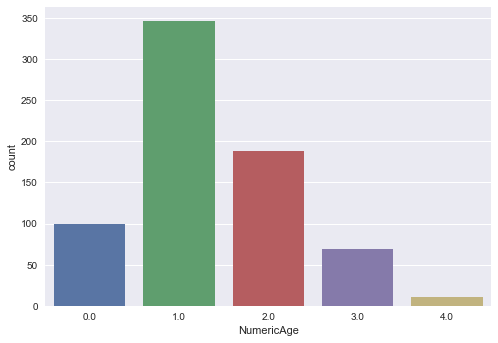

In [60]:
sns.countplot(df["NumericAge"])
plt.show()

In [61]:
df['CategoricalAge'] = pd.cut(df['Age'], 5)

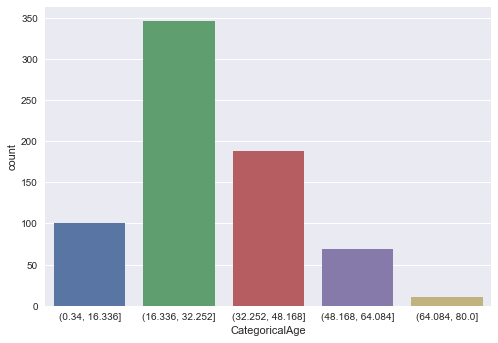

In [62]:
sns.countplot(df["CategoricalAge"])
plt.show()

In [63]:
df["CategoricalAge"].head()

0    (16.336, 32.252]
1    (32.252, 48.168]
2    (16.336, 32.252]
3    (32.252, 48.168]
4    (32.252, 48.168]
Name: CategoricalAge, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [64]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

df["Person"] = df[['Age', 'Sex']].apply(get_person, axis=1)

In [65]:
df["Person"].unique()

array(['male', 'female', 'child'], dtype=object)

In [66]:
df["Sex"] = df["Sex"].map({'female': 0, 'male': 1}).astype(int)
title_mapping = {'Mr': 1, "Miss": 3, "Master": 4, 'Rare': 5}
df["Title"] = df["Title"].map(title_mapping)
df["Title"] = df["Title"].fillna(0)

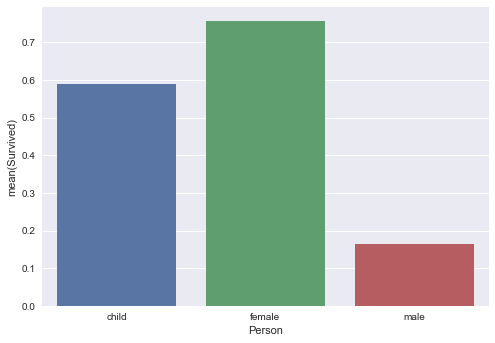

In [67]:
df_1 = df[['Person', 'Survived']].groupby(['Person'], as_index=False).mean()
sns.barplot("Person", "Survived", data=df_1)
plt.show()

In [68]:
df.groupby([df.Person, df.Embarked]).agg({'Age':'mean', 'Survived': 'sum'})[['Age', 'Survived']].reset_index()

,Person,Embarked,Age,Survived
0,child,C,8.245556,14
1,child,Q,7.200000,1
2,child,S,5.737500,34
3,female,C,33.750000,53
4,female,Q,25.136364,26
5,female,S,31.716561,124
6,male,C,34.960938,26
7,male,Q,39.500000,3
8,male,S,32.608309,59


In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NumericAge,CategoricalAge,Person
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,1.0,"(16.336, 32.252]",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,2.0,"(32.252, 48.168]",female
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0,1.0,"(16.336, 32.252]",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,2.0,"(32.252, 48.168]",female
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1.0,2.0,"(32.252, 48.168]",male


### 1. group data by person and class, and get average information about age, sum of survived persons and average ticket price

In [74]:
df.groupby([df.Person, df.Pclass]).agg({'Age':'mean', 'Survived': 'sum', 'Fare': 'mean'})[['Age', 'Survived', 'Fare']].reset_index()
# knowledge retrived:

,Person,Pclass,Age,Survived,Fare
0,child,1,7.820000,5,139.382633
1,child,2,4.543684,19,28.323905
2,child,3,6.817586,25,23.220190
3,female,1,35.500000,89,104.317995
4,female,2,32.179688,60,20.868624
5,female,3,27.854167,56,15.354351
6,male,1,42.382653,42,65.951086
7,male,2,33.588889,8,19.054124
8,male,3,28.995556,38,11.340213


### 2. bar chart survival probability by person in different classes

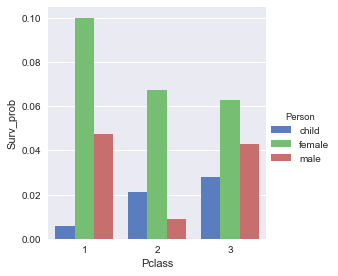

In [92]:
df_surv_prob = df.groupby([df.Person, df.Pclass]).agg({'Age': 'mean', 'Survived': 'sum'})[['Age', 'Survived']].reset_index()
df_surv_prob["Surv_prob"] = df_surv_prob['Survived'] / len(df['Survived'] == 1)

sns.factorplot("Pclass", "Surv_prob", "Person", data=df_surv_prob, kind="bar", palette="muted", legend=True)
plt.show()

### 3. relationship between fare and age by person

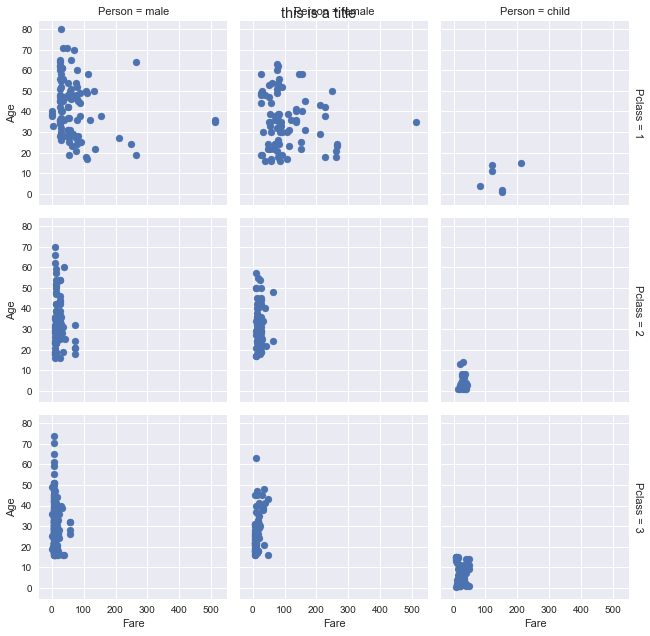

In [98]:
g = sns.FacetGrid(df, col="Person", row="Pclass", margin_titles=True)
g.map(plt.scatter, "Fare", "Age")

g.fig.suptitle("this is a title")

plt.show()

### 4. bar chart survival probability by person in different embakred points

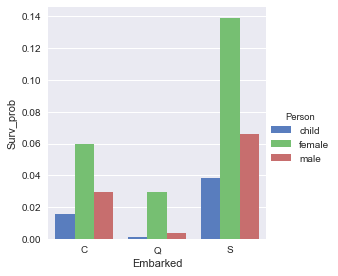

In [99]:
df_surv_prob = df.groupby([df.Person, df.Embarked]).agg({'Age': 'mean', 'Survived': 'sum'})[['Age', 'Survived']].reset_index()
df_surv_prob["Surv_prob"] = df_surv_prob['Survived'] / len(df['Survived'] == 1)

sns.factorplot("Embarked", "Surv_prob", "Person", data=df_surv_prob, kind="bar", palette="muted", legend=True)
plt.show()

In [101]:
df_surv_prob = df.groupby([df.Person, df.Surv_prob]).agg({'Age': 'mean', 'SibSp': 'mean', 'Parch': 'mean'})[['Age', 'SibSp', 'Parch']].reset_index()
df_surv_prob["Surv_prob"] = df_surv_prob['Survived'] / len(df['Survived'] == 1)

sns.factorplot("Surv_prob", "Person", "Person", data=df_surv_prob, kind="bar", palette="muted", legend=True)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Surv_prob'

In [102]:
df["Cabin"].value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
D                  3
F33                3
E101               3
F2                 3
C22 C26            3
B28                2
B57 B59 B63 B66    2
B58 B60            2
E33                2
E24                2
E67                2
C93                2
D20                2
B77                2
B49                2
B22                2
C126               2
E44                2
D17                2
D36                2
F G73              2
F4                 2
C123               2
B35                2
C2                 2
C92                2
B5                 2
                  ..
C47                1
D48                1
A32                1
C46                1
C54                1
A20                1
B101               1
C7                 1
C106               1
D50                1
E49                1
A34                1
E46                1
F G63              1
E58                1
B41                1
D45          